<a href="https://colab.research.google.com/github/wajidminhas/AI-Agents/blob/main/gemini_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%%capture --no-stderr
%pip install  -q langchain-community langchain-core langchain_google_genai tavily-python

In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=GEMINI_API_KEY,
    temperature=0
)

In [10]:
result = llm.invoke("what is the capital of france")
result


AIMessage(content='The capital of France is **Paris**.\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-985353e3-c42f-446b-a34b-0d4c1e046795-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})

In [11]:
from langchain_core.messages import AIMessage, HumanMessage

# msg = HumanMessage(content="what is the capital of france")

message = [HumanMessage(content="what is the capital of france", name = "History Student"),
           AIMessage(content='The capital of France is **Paris**.\n', name= "AI Assistent"),
           HumanMessage(content="Where is paris situated?", name= "History Student"),
           AIMessage(content="Paris is situated in **northern France**, on the **Seine River**.\n", name = "AI Assistent"),
           HumanMessage(content="So where is France?", name = "History Student"),
           HumanMessage(content="what is current situation of Syria", name="History Student")]


result = llm.invoke(message)
result.content

"The current situation in Syria is incredibly complex and dire, characterized by ongoing conflict, humanitarian crisis, and political instability.  There's no single, simple answer, but here are some key aspects:\n\n* **Ongoing Civil War:**  The Syrian Civil War, which began in 2011, continues, though large-scale battles are less frequent than in previous years.  However, sporadic fighting and clashes persist in various regions.  Different factions, including the Syrian government, various rebel groups, Kurdish forces (SDF), and extremist groups (though significantly weakened), remain active.\n\n* **Humanitarian Catastrophe:** Millions of Syrians have been displaced, both internally and externally, creating a massive refugee crisis.  Many are living in precarious conditions with limited access to food, water, shelter, and healthcare.  The ongoing conflict and economic collapse have exacerbated poverty and hunger.\n\n* **Political Landscape:** The Assad regime, backed by Russia and Iran

In [12]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults

from google.colab import userdata
TAVILY_API_KEY = userdata.get('TAVILY_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")


tavily_search = TavilySearchResults(max_results=4)

search_result = tavily_search.invoke("what is the latest situation in Syria")




In [13]:
search_result

[{'url': 'https://www.cfr.org/global-conflict-tracker/conflict/conflict-syria',
  'content': 'According to the U.S.-led coalition against the Islamic State, Iraqi security forces and the SDF have reclaimed 98 percent of the territory formerly held by the group in Iraq and Syria, including Raqqa and Deir al-Zour.\nWith Russian and Iranian support, the Syrian government has steadily regained control of territory from opposition forces, including the opposition’s stronghold in Aleppo in 2016. What began as protests against President Assad’s regime in 2011 quickly escalated into a full-scale war between the Syrian government—backed by Russia and Iran—and anti-government rebel groups—backed by the United States and a rotating number of U.S. allies, including European allies like France, the United Kingdom, and Italy, as well as regional players like Saudi Arabia, Turkey, Jordan, and the UAE. After a series of terrorist attacks coordinated by the Islamic State across Europe in 2015, the Unit

In [14]:
from langchain_core.messages.ai import AIMessage

ai_message : AIMessage = llm.invoke("hy, agentice AI?")




In [15]:
print(ai_message.content)

Hi there!  As a large language model, I'm an AI, but I don't have an agency in the human sense.  I don't have my own goals, desires, or the ability to act independently in the real world.  I respond to your prompts and questions based on the data I've been trained on.  Is there anything I can help you with today?



In [16]:
from typing_extensions import TypedDict

class FirstLLMAgentCall(TypedDict):
    prompt: str
    response: str

In [17]:
def ai_node(state : FirstLLMAgentCall):
  print("---Node-1---", state)
  prompt = state["prompt"]
  ai_message : AIMessage = llm.invoke(prompt)
  return {"prompt": prompt, "response": ai_message.content}

In [18]:
greet_to_agent = ai_node(FirstLLMAgentCall(prompt = "hy, agentice AI?"))
print(greet_to_agent)


---Node-1--- {'prompt': 'hy, agentice AI?'}
{'prompt': 'hy, agentice AI?', 'response': "Hi there!  As a large language model, I'm an AI, but I don't have an agency in the human sense.  I don't have personal goals, beliefs, or the ability to act independently in the real world.  I respond to your prompts based on the data I've been trained on.  Is there anything I can help you with today?\n"}


In [19]:
!pip install langgraph

In [20]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph


# HERE WE WILL DEFINE GRAPH
builder = StateGraph = StateGraph(state_schema=FirstLLMAgentCall)


# HERE WE WILL DEFINE NODES

builder.add_node("Node-1", ai_node)


# HERE WE WILL DEFINE EDGES

builder.add_edge(START, "Node-1")
builder.add_edge("Node-1", END)

# HERE GRAPH WILL COMPILE

graph : CompiledStateGraph = builder.compile()



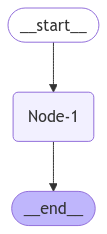

In [21]:
# DISPLAY IMAGE OF GRAPH
display(Image(graph.get_graph().draw_mermaid_png()))